In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import string as s
import re
import os

import spacy
from spacy.util import minibatch, compounding


import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
from nltk import SnowballStemmer, word_tokenize

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc,f1_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from lightgbm import LGBMClassifier


lemmatizer=nltk.stem.WordNetLemmatizer()


dataset_url = 'https://raw.githubusercontent.com/josepicon/URL-/main/MD009%20-%20Advanced%20Data%20Analysis%20Tools/Project/clickbait_data.csv'
data = pd.read_csv(dataset_url)
data.head()

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [21]:
data.clickbait.value_counts()

0    16001
1    15999
Name: clickbait, dtype: int64

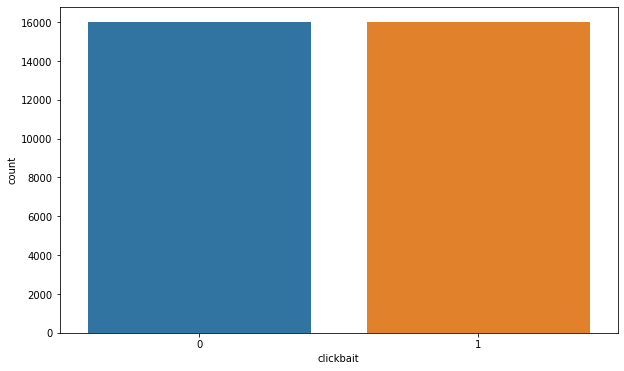

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data = data, x='clickbait')
plt.show()

In [23]:
data.isnull().sum()

headline     0
clickbait    0
tuples       0
dtype: int64

In [111]:
x_train, x_test, y_train, y_test = train_test_split(data.headline, data.clickbait, stratify=data.clickbait, random_state=1, test_size=0.3, shuffle=True)

In [112]:
tfidf=TfidfVectorizer()
tfidf_train=tfidf.fit_transform(x_train)
len(tfidf.vocabulary_)

19467

In [113]:
print("Tamaño de X_train",x_train.shape,"\nTamaño de X_test", x_test.shape,"\nTamaño de Y_train",
      y_train.shape,"\nTamaño de Y_test", y_test.shape)


Tamaño de X_train (22400,) 
Tamaño de X_test (9600,) 
Tamaño de Y_train (22400,) 
Tamaño de Y_test (9600,)


In [114]:
#Tokenization of the data where we are splitting the headlines into tokens (individual words) 
def token(text):
    lst=text.split()
    return lst

#transforming all the text into lowercase 
def lowercase(lst):
    new_lst=[]
    for i in lst:
        i=i.lower()
        new_lst.append(i)
    return new_lst

#remove punctuations 
def punctuations(lst):
    new_lst=[]
    for i in lst:
        for j in s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst

#remove stopwords
def sw(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

#remove spaces 
def spaces(yes):
    new_yes=[]
    for i in yes:
        i=i.strip()
        new_yes.append(i)
    return new_yes

def lemmatzation(yes):
    new_yes=[]
    for i in yes:
        i=lemmatizer.lemmatize(i)
        new_yes.append(i)
    return new_yes


def numbers(text):
    new_yes=[]
    for i in text:
        review = re.sub('[^a-zA-Z]', ' ', i)
        new_yes.append(review)
    return new_yes

#Function for Plotting the confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    #Create Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a dataframe with the confusion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))
    plt.figure(figsize = (10,7))
    # Plot the confusion matrix
    sns.set(font_scale=1.4) #for label size
    sns.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})# font size
    plt.show()

#Function for Plotting the ROC Curve
def plot_roc_curve(y_test, y_pred):
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [115]:
x_train=x_train.apply(token)
x_test=x_test.apply(token)
x_train=x_train.apply(lowercase)
x_test=x_test.apply(lowercase)
x_train=x_train.apply(punctuations)
x_test=x_test.apply(punctuations)
x_train=x_train.apply(sw)
x_test=x_test.apply(sw)
x_train=x_train.apply(numbers)
x_test=x_test.apply(numbers)
x_train=x_train.apply(spaces)
x_test=x_test.apply(spaces)
x_train=no_lem_train=x_train.apply(lemmatzation)
x_test=no_lem_test=x_test.apply(lemmatzation)


In [116]:
x_train=x_train.apply(lambda x: ' '.join(x))
x_test=x_test.apply(lambda x: ' '.join(x))
no_lem_train=no_lem_train.apply(lambda x: ' '.join(x))
no_lem_test=no_lem_test.apply(lambda x: ' '.join(x))

get bings


In [117]:
tfidf=TfidfVectorizer()
tfidf_train=tfidf.fit_transform(x_train)
tfidf_test=tfidf.transform(x_test)
len(tfidf.vocabulary_)

17670

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy score for MultinomialNB is:  96.28125 %
Metrics Classification Report:
              precision    recall  f1-score   support

           0    0.96956   0.95562   0.96254      4800
           1    0.95625   0.97000   0.96308      4800

    accuracy                        0.96281      9600
   macro avg    0.96291   0.96281   0.96281      9600
weighted avg    0.96291   0.96281   0.96281      9600



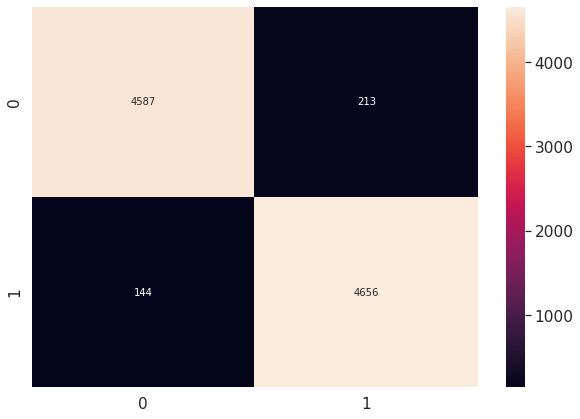

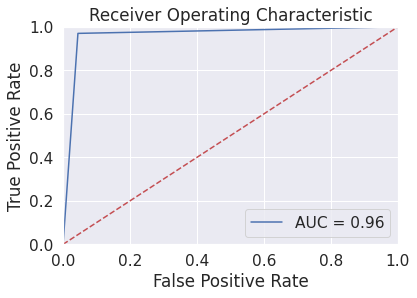

In [71]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }

model = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=4).fit(tfidf_train, y_train)

y_pred = model.predict(tfidf_test)
print("Accuracy score for MultinomialNB is: ", accuracy_score(y_test, y_pred) * 100, '%')
print('Metrics Classification Report:')
print(metrics.classification_report(y_test, y_pred,  digits=5))
plot_confusion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

In [74]:
cv = CountVectorizer(max_features=5000,ngram_range=(2,2))
X = cv.fit_transform(no_lem_train).toarray()
feature_names = cv.get_feature_names()
sorted(zip(model.best_estimator_.coef_[0], feature_names), reverse=True)[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-5.54700133307169, 'anyone obsessed'),
 (-5.566156287530232, 'evo morale'),
 (-5.764742369906911, 'french open'),
 (-5.910572051709538, 'marry kill'),
 (-6.325736406278518, 'nato take'),
 (-6.351921379815612, 'try bizarre'),
 (-6.402081678158832, 'lover need'),
 (-6.407142846360739, 'three minute'),
 (-6.479147597821222, 'shed never'),
 (-6.620032417912548, 'like shit'),
 (-6.7243960793229505, 'people review'),
 (-6.7523918375474405, 'hall fame'),
 (-6.796403118539709, 'church scientology'),
 (-6.855462110834747, 'probably never'),
 (-6.857321946378986, 'australian senate'),
 (-6.8785498860320615, 'candy corn'),
 (-6.902573791266265, 'station ban'),
 (-6.941508698010982, 'powerful photo'),
 (-6.942805924262254, 'give intense'),
 (-6.9685196453555465, 'friend fan')]

In [73]:
# word sets that are mostly clickbait 
sorted(zip(model.best_estimator_.coef_[0], feature_names))[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-11.142457920423464, 'abdelbaset ali'),
 (-11.142457920423464, 'able answer'),
 (-11.142457920423464, 'absolute best'),
 (-11.142457920423464, 'abu ghraib'),
 (-11.142457920423464, 'academy science'),
 (-11.142457920423464, 'acceptance speech'),
 (-11.142457920423464, 'activist arrested'),
 (-11.142457920423464, 'actor peter'),
 (-11.142457920423464, 'actually belong'),
 (-11.142457920423464, 'actually best'),
 (-11.142457920423464, 'actually buy'),
 (-11.142457920423464, 'actually change'),
 (-11.142457920423464, 'actually delicious'),
 (-11.142457920423464, 'actually easy'),
 (-11.142457920423464, 'actually eat'),
 (-11.142457920423464, 'actually exist'),
 (-11.142457920423464, 'actually get'),
 (-11.142457920423464, 'actually got'),
 (-11.142457920423464, 'actually help'),
 (-11.142457920423464, 'actually helped')]

In [175]:
# Define the parameters to tune
parameters = { 
    'C': [1.0, 10],
    'gamma': [1, 'auto', 'scale']
}
# Tune yyperparameters  using Grid Search and a SVM model
model = GridSearchCV(SVC(kernel='rbf'), parameters, cv=5, n_jobs=-1,verbose=4).fit(tfidf_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Accuracy score for SVC is:  95.84375 %
Metrics Classification Report:
              precision    recall  f1-score   support

           0    0.95324   0.96417   0.95867      4800
           1    0.96375   0.95271   0.95820      4800

    accuracy                        0.95844      9600
   macro avg    0.95850   0.95844   0.95844      9600
weighted avg    0.95850   0.95844   0.95844      9600



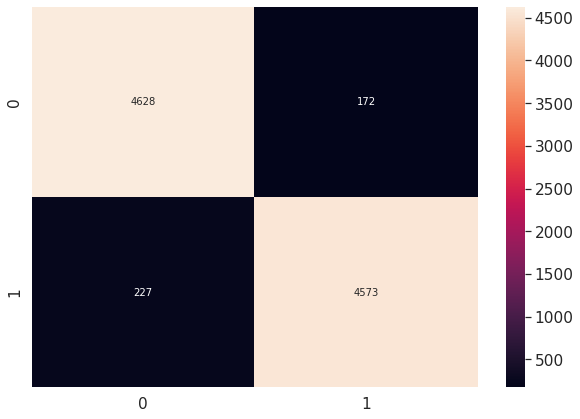

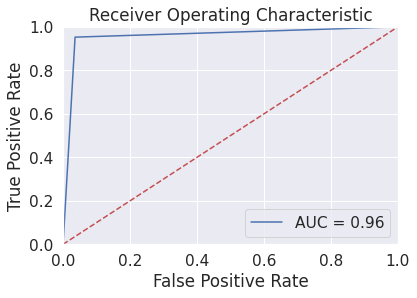

In [182]:
y_pred = model.predict(tfidf_test)
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred) * 100, '%')
print('Metrics Classification Report:')
print(metrics.classification_report(y_test, y_pred,  digits=5))
plot_confusion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

In [190]:
parameters = {'min_child_weight': [5, 10],
        'gamma': [0.5, 2, 5],
        'subsample': [0.5, 1.0],
        'colsample_bytree': [0.5, 1.0],
        'max_depth': [5, 10]}

model = GridSearchCV(XGBClassifier(), parameters, cv=5, n_jobs=-1,verbose=4).fit(tfidf_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Accuracy score for SVC is:  85.07291666666667 %
Metrics Classification Report:
              precision    recall  f1-score   support

           0    0.79243   0.95042   0.86426      4800
           1    0.93807   0.75104   0.83420      4800

    accuracy                        0.85073      9600
   macro avg    0.86525   0.85073   0.84923      9600
weighted avg    0.86525   0.85073   0.84923      9600



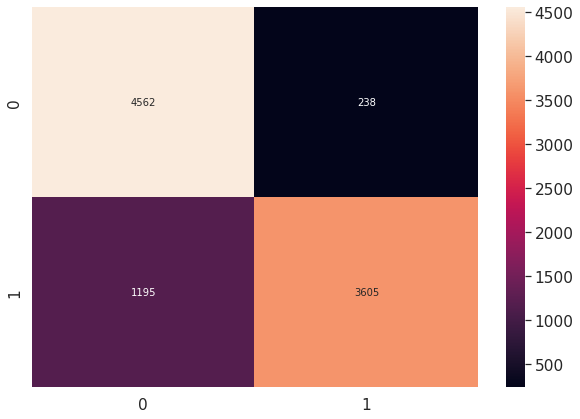

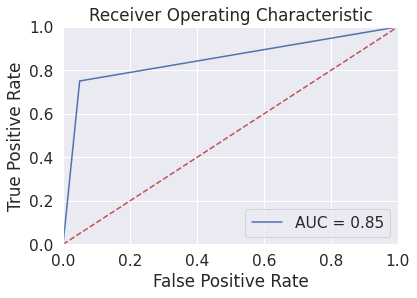

In [191]:
y_pred = model.predict(tfidf_test)
print("Accuracy score for XGBClassifier is: ", accuracy_score(y_test, y_pred) * 100, '%')
print('Metrics Classification Report:')
print(metrics.classification_report(y_test, y_pred,  digits=5))
plot_confusion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

In [12]:
nlp=spacy.load("en_core_web_sm")
nlp.pipe_names

['tagger', 'parser', 'ner']

In [13]:
textcat=nlp.create_pipe( "textcat", config={"exclusive_classes": True})
nlp.add_pipe(textcat, last=True)
nlp.pipe_names

['tagger', 'parser', 'ner', 'textcat']

In [14]:
textcat.add_label("POSITIVE")
textcat.add_label("NEGATIVE")

1

In [15]:
data['tuples'] = data.apply(lambda row: (row['headline'].casefold(),row['clickbait']), axis=1)
train = data['tuples'].tolist()
train[:10]

[('should i get bings', 1),
 ('which tv female friend group do you belong in', 1),
 ('the new "star wars: the force awakens" trailer is here to give you chills',
  1),
 ('this vine of new york on "celebrity big brother" is fucking perfect', 1),
 ('a couple did a stunning photo shoot with their baby after learning she had an inoperable brain tumor',
  1),
 ('how to flirt with queer girls without making a total fool of yourself', 1),
 ('32 cute things to distract from your awkward thanksgiving', 1),
 ('if disney princesses were from florida', 1),
 ("what's a quote or lyric that best describes your depression", 1),
 ('natalie dormer and sam claflin play a game to see how they\'d actually last in "the hunger games"',
  1)]

In [16]:
def load_data(limit=0, split=0.8):
    train_data=train
    # Shuffle the data
    random.shuffle(train_data)
    texts, labels = zip(*train_data)
    # get the categories for each review
    cats = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)} for y in labels]

    # Splitting the training and evaluation data
    split = int(len(train_data) * split)
    return (texts[:split], cats[:split]), (texts[split:], cats[split:])

n_texts=23486

# Calling the load_data() function 
(train_texts, train_cats), (dev_texts, dev_cats) = load_data(limit=n_texts)

# Processing the final format of training data
train_data = list(zip(train_texts,[{'cats': cats} for cats in train_cats]))
train_data[:10]


[('which "x-men" heroine are you',
  {'cats': {'NEGATIVE': False, 'POSITIVE': True}}),
 ('where iron is bigger than oil or gold',
  {'cats': {'NEGATIVE': True, 'POSITIVE': False}}),
 ('how well do you know regina george',
  {'cats': {'NEGATIVE': False, 'POSITIVE': True}}),
 ("here's what happens when tater tots and cheeseburgers join forces",
  {'cats': {'NEGATIVE': False, 'POSITIVE': True}}),
 ('kenya negotiations resume; parliament to debate power sharing accord',
  {'cats': {'NEGATIVE': True, 'POSITIVE': False}}),
 ('amy schumer perfectly shut down a film critic for his sexist comment',
  {'cats': {'NEGATIVE': False, 'POSITIVE': True}}),
 ("two huge broadway stars covered selena gomez and it's amazing",
  {'cats': {'NEGATIVE': False, 'POSITIVE': True}}),
 ('un demands return of aid seized by hamas',
  {'cats': {'NEGATIVE': True, 'POSITIVE': False}}),
 ('robbery suspect flees on riding mower',
  {'cats': {'NEGATIVE': True, 'POSITIVE': False}}),
 ('special report on japanese tsunami e

In [17]:
def evaluate(tokenizer, textcat, texts, cats):
    docs = (tokenizer(text) for text in texts)
    tp = 0.0  # True positives
    fp = 1e-8  # False positives
    fn = 1e-8  # False negatives
    tn = 0.0  # True negatives
    for i, doc in enumerate(textcat.pipe(docs)):
        gold = cats[i]
        for label, score in doc.cats.items():
            if label not in gold:
                continue
            if label == "NEGATIVE":
                continue
            if score >= 0.5 and gold[label] >= 0.5:
                tp += 1.0
            elif score >= 0.5 and gold[label] < 0.5:
                fp += 1.0
            elif score < 0.5 and gold[label] < 0.5:
                tn += 1
            elif score < 0.5 and gold[label] >= 0.5:
                fn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    if (precision + recall) == 0:
        f_score = 0.0
    else:
        f_score = 2 * (precision * recall) / (precision + recall)
    return {"textcat_p": precision, "textcat_r": recall, "textcat_f": f_score}


In [18]:
n_iter=5

other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'textcat']
with nlp.disable_pipes(*other_pipes):  # only train textcat
    optimizer = nlp.begin_training()

    print("Training the model...")
    print('{:^5}\t{:^5}\t{:^5}\t{:^5}'.format('LOSS', 'P', 'R', 'F'))

    # Performing training
    for i in range(n_iter):
        losses = {}
        batches = minibatch(train_data, size=compounding(4., 32., 1.001))
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd=optimizer, drop=0.2,
                       losses=losses)

      # Calling the evaluate() function and printing the scores
        with textcat.model.use_params(optimizer.averages):
            scores = evaluate(nlp.tokenizer, textcat, dev_texts, dev_cats)
        print('{0:.3f}\t{1:.3f}\t{2:.3f}\t{3:.3f}'  
              .format(losses['textcat'], scores['textcat_p'],
                      scores['textcat_r'], scores['textcat_f']))

Training the model...
LOSS 	  P  	  R  	  F  
7.341	0.971	0.968	0.969
1.637	0.978	0.976	0.977
0.706	0.979	0.975	0.977
0.417	0.979	0.977	0.978
0.239	0.978	0.975	0.976
